# VGG16

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Constant Parameters
TRAIN_DIR = "../../data/train/"
MODEL_DIR = "../models/"
VALIDATION_SPLIT = 0.2
IMAGE_HEIGHT = IMAGE_WIDTH = 224
BATCH_SIZE = 64
SEED = 1

# Training Parameters
NUM_EPOCHS = 15
STARTING_EPOCH = 0
OPTIMIZER = keras.optimizers.Adam()
LOSS_FN = keras.losses.CategoricalCrossentropy()

In [6]:
model_id = "vgg16_9_15epochs"              # Unique Identifier used for saving model
color_mode = "rgb"                        # "rgb", "rgba" or "grayscale"
image_depth = 3

In [7]:
# Model Architecture
def get_model(image_depth, num_classes):
    model = keras.models.Sequential()
    
    model.add(keras.applications.VGG16(include_top = False,
                                         pooling = "avg",
                                         input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, image_depth)))
    model.add(keras.layers.Dense(1024, activation = "relu"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(num_classes, activation = "softmax"))
    
    model.layers[0].trainable = False
    return model

In [8]:
# Data Augmentation Parameters
image_generator = ImageDataGenerator(
    validation_split = VALIDATION_SPLIT,
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    zoom_range = 0.4
)

In [13]:
train_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle = True,
    seed = SEED,
    class_mode = "categorical",
    subset = "training"
)

Found 84331 images belonging to 42 classes.


In [14]:
validation_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode = "categorical",
    subset = "validation"
)

Found 21061 images belonging to 42 classes.


In [15]:
model = get_model(image_depth, train_data_gen.num_classes)

58892288/58889256 [==============================] - 3s 0us/step


In [16]:
model.compile(
    optimizer = OPTIMIZER,
    loss = LOSS_FN,
    metrics = ["accuracy"]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 42)                43050     
Total params: 15,287,146
Trainable params: 570,410
Non-trainable params: 14,716,736
_________________________________________________________________


In [11]:
history = model.fit(
    train_data_gen,
    epochs = NUM_EPOCHS,
    initial_epoch = STARTING_EPOCH,
    steps_per_epoch = train_data_gen.n // BATCH_SIZE,
    validation_data = validation_data_gen,
    callbacks = [
        keras.callbacks.CSVLogger(MODEL_DIR + "{}.csv".format(model_id))
    ]
)

Epoch 1/15
210/210 [==============================] - 236s 1s/step - loss: 2.7500 - accuracy: 0.2967 - val_loss: 2.8984 - val_accuracy: 0.2824
Epoch 2/15
210/210 [==============================] - 249s 1s/step - loss: 2.3132 - accuracy: 0.3871 - val_loss: 2.3999 - val_accuracy: 0.3723
Epoch 3/15
210/210 [==============================] - 238s 1s/step - loss: 2.1898 - accuracy: 0.4182 - val_loss: 2.5012 - val_accuracy: 0.3503
Epoch 4/15
210/210 [==============================] - 235s 1s/step - loss: 2.1240 - accuracy: 0.4356 - val_loss: 2.3861 - val_accuracy: 0.4024
Epoch 5/15
210/210 [==============================] - 244s 1s/step - loss: 2.0849 - accuracy: 0.4408 - val_loss: 2.3256 - val_accuracy: 0.4009
Epoch 6/15
210/210 [==============================] - 258s 1s/step - loss: 2.0326 - accuracy: 0.4526 - val_loss: 2.3562 - val_accuracy: 0.3878
Epoch 7/15
210/210 [==============================] - 260s 1s/step - loss: 2.0240 - accuracy: 0.4563 - val_loss: 2.4327 - val_accuracy: 0.3744

In [18]:
history = model.fit(
    train_data_gen,
    epochs = NUM_EPOCHS,
    initial_epoch = STARTING_EPOCH,
    steps_per_epoch = train_data_gen.n // BATCH_SIZE
)

Epoch 1/15
   8/1317 [..............................] - ETA: 1:15:47 - loss: 3.9945 - accuracy: 0.0430

KeyboardInterrupt: 

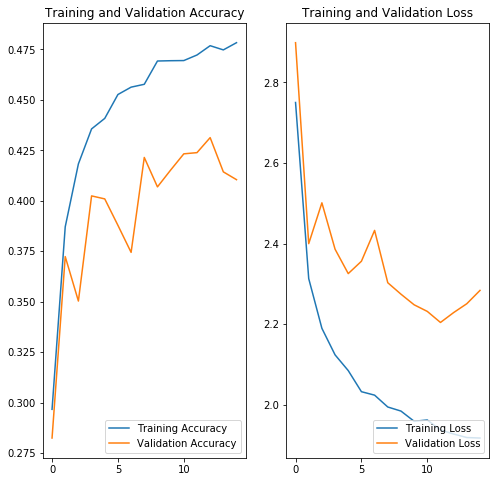

In [12]:
acc = history.history["accuracy"]
loss = history.history["loss"]
validation_acc = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, validation_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, validation_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.show()

In [13]:
model.save(MODEL_DIR + "{}.h5".format(model_id), overwrite = False)